In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [12]:
dataset = pd.read_csv("Advertising Budget and Sales (1).csv")

Missing Values:
 Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64
Duplicate Rows: False


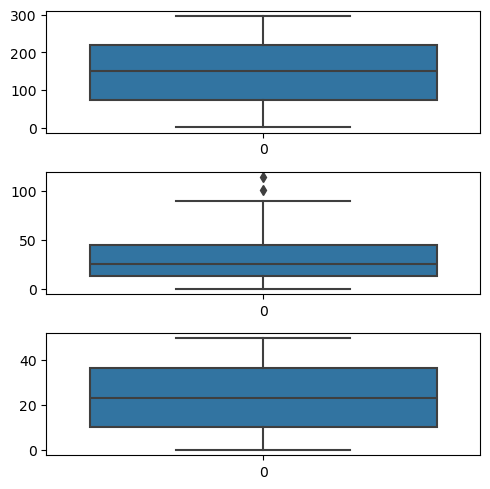

In [13]:
# 1. Checking for missing values 
missing_values = dataset.isna().sum()
print("Missing Values:\n", missing_values)

# 2. Checking for duplicate rows
duplicate_rows = dataset.duplicated().any()
print("Duplicate Rows:", duplicate_rows)

# 3. Checking for outliers
fig, axs = plt.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(dataset['TV Ad Budget ($)'], ax=axs[0])
plt2 = sns.boxplot(dataset['Newspaper Ad Budget ($)'], ax=axs[1])
plt3 = sns.boxplot(dataset['Radio Ad Budget ($)'], ax=axs[2])
plt.tight_layout()

C:\Users\MY DELL\AppData\Local\Temp\ipykernel_10144\1113947756.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sales ($)'])
E:\Users\MY DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


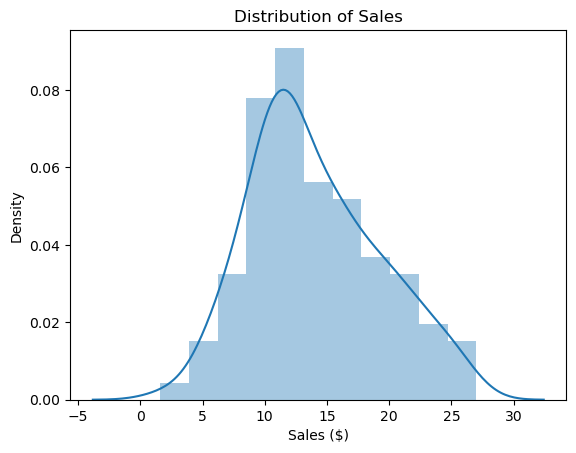

In [14]:
sns.distplot(dataset['Sales ($)'])
plt.title("Distribution of Sales")
plt.show()

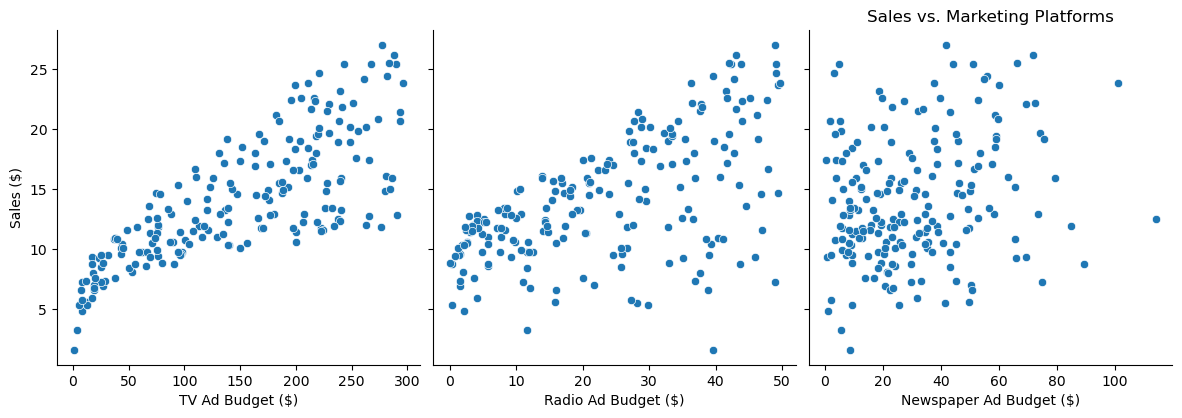

In [15]:
sns.pairplot(dataset, x_vars=['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)'], y_vars='Sales ($)', height=4, aspect=1, kind='scatter')
plt.title("Sales vs. Marketing Platforms")
plt.show()

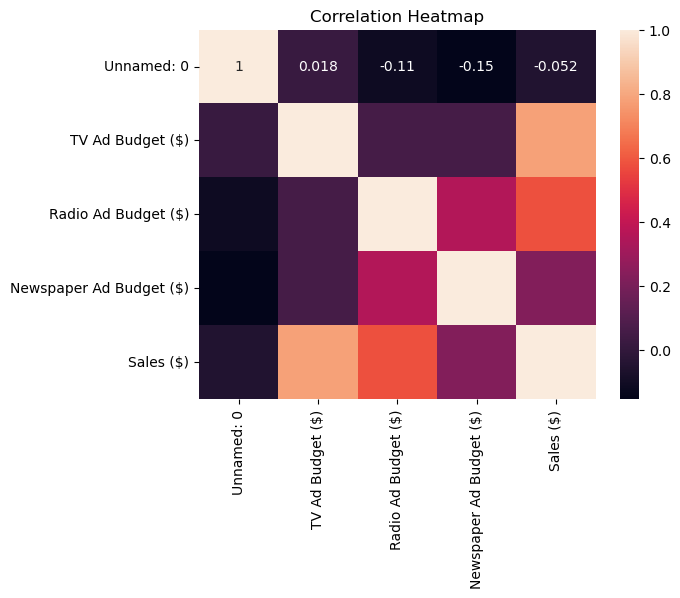

In [16]:
sns.heatmap(dataset.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# Linear Regression
# Setting the value for X and Y
x = dataset[['TV Ad Budget ($)']]
y = dataset['Sales ($)']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

slr = LinearRegression()
slr.fit(x_train, y_train)

# Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)
print('Regression Equation: Sales = {:.3f} + {:.3f} * TV Ad Budget ($)'.format(slr.intercept_, slr.coef_[0]))

Intercept:  6.989665857411679
Coefficient: [0.04649736]
Regression Equation: Sales = 6.990 + 0.046 * TV Ad Budget ($)


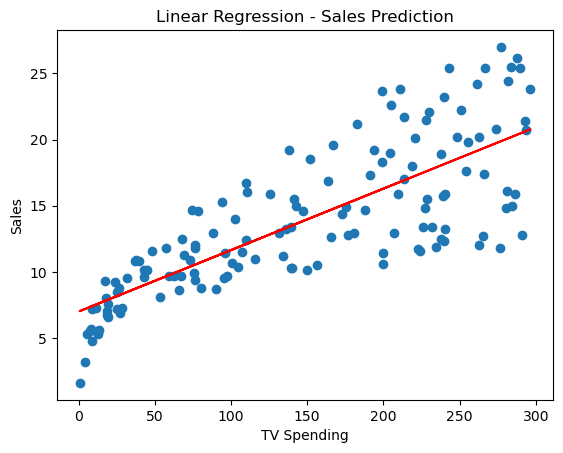

In [18]:
plt.scatter(x_train, y_train)
plt.plot(x_train, slr.predict(x_train), 'r')
plt.title("Linear Regression - Sales Prediction")
plt.xlabel("TV Spending")
plt.ylabel("Sales")
plt.show()

In [19]:
# Prediction of Test and Training set result
y_pred_slr = slr.predict(x_test)
x_pred_slr = slr.predict(x_train)

# Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
print("\nLinear Regression - Actual vs. Predicted:\n", slr_diff)


Linear Regression - Actual vs. Predicted:
      Actual value  Predicted value
126           6.6         7.352345
104          20.7        18.065337
99           17.2        13.276109
92           19.4        17.112141
111          21.8        18.228077
167          12.2        16.605320
116          12.2        13.462098
96           11.7        16.177544
52           22.6        17.051694
69           22.3        17.070293
164          11.9        12.439156
124          19.7        17.660810
182           8.7         9.602817
154          15.6        15.721870
125          10.6        11.044236
196           9.7        11.369717
194          17.3        13.950320
177          11.7        14.903516
163          18.0        14.591984
31           11.9        12.239218
11           17.4        16.972649
73           11.0        13.006424
15           22.4        16.075250
41           17.1        15.219698
97           15.5        15.587027
128          24.7        17.233034
133        

In [20]:
new_tv_spending = 56
predicted_sales = slr.predict([[new_tv_spending]])
print("\nPrediction for TV Spending {}: {:.3f}".format(new_tv_spending, predicted_sales[0]))


Prediction for TV Spending 56: 9.594


E:\Users\MY DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
# R-squared value for the model
r_squared = slr.score(x, y)
print('\nR squared value of the model: {:.2f}'.format(r_squared * 100))

# Model Accuracy Metrics
mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred_slr)
mean_squared_error = metrics.mean_squared_error(y_test, y_pred_slr)
root_mean_squared_error = np.sqrt(mean_squared_error)

print('Mean Absolute Error:', mean_absolute_error)
print('Mean Square Error:', mean_squared_error)
print('Root Mean Square Error:', root_mean_squared_error)


R squared value of the model: 61.02
Mean Absolute Error: 2.1619849326720724
Mean Square Error: 7.97579853285485
Root Mean Square Error: 2.8241456288327007
